# Аналитика в авиакомпании

### План:
1. Изучим данные разными методами, чтобы проверить пропуски, типы данных и познакомиться с самими данными, которые доступны для исследования.
2. Проанализируем данные:
    - Выберем топ-10 городов по количеству рейсов.
    - Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.
    
    Будем использовать методы визуализации данных из библиотек matplotlib и seaborn.
3. Сформируем выводы.

## Шаг 1. Откроем файлы с данными и изучим общую информацию

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загружаем файлы

# данные о моделях самолетов и количество рейсов для каждой модели самолетов в сентябре 2018 года
model = pd.read_csv('/datasets/query_1.csv') 

# данные о городах и среднем количестве рейсов, прибывающих в город за день в августе 2018 года
city = pd.read_csv('/datasets/query_3.csv') 

**Посмотрим на общую информацию по каждому датасету в отдельных ячейках**

In [3]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Проверим дубликаты**

In [5]:
datasets = [model, city]

for dataset in datasets:
    display(dataset.duplicated().sum())

0

0

Дубликатов и пропусков нет.

**Посмотрим на описательные статистики по каждому датасету**

In [6]:
for dataset in datasets:
    display(dataset.describe())

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


**Посмотрим на сами датасеты**

In [7]:
for dataset in datasets:
    display(dataset.head(10))

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


### Вывод

Данные в порядке:

1. Пропусков и дублей в таблицах нет.

2. Типы данных соответствуют указанным данным.


## Шаг 2. Анализ данных

Необходимо:
1. Выбрать топ-10 городов по количеству рейсов
2. Построить графики: 
    - модели самолетов и количество рейсов, 
    - города и количество рейсов, 
    - топ-10 городов и количество рейсов.

### Выберём топ-10 городов по среднему количеству рейсов в день

In [8]:
top_10_city = city.sort_values('average_flights', ascending = False).head(10)

top_10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Москва ожидаемо на первом месте с большим отрывом. На втором месте также ожидаемо - Питер.

В топ-10 никаких сюрпризов.

### Строим графики

**Модели самолетов и количество рейсов**

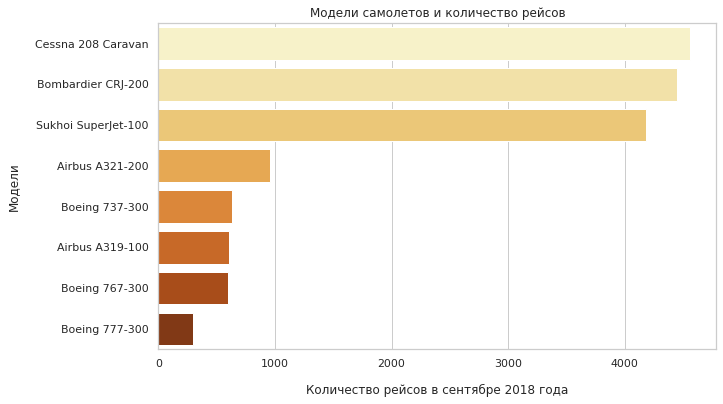

In [9]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 6))

ax = sns.barplot(x="flights_amount", 
                 y="model", 
                 data=model.sort_values('flights_amount', ascending = False), 
                 palette = 'YlOrBr')
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Количество рейсов в сентябре 2018 года', labelpad = 15)
plt.ylabel('Модели', labelpad = 15)
plt.show();

***Вывод***

Интересно, больше всего рейсов совершается на модели Cessna 208 Caravan. Это лёгкий турбовинтовой одномоторный самолёт, основная модель которого транспортирует девять пассажиров (до тринадцати пассажиров с разрешения FAA).

Второе место по количеству рейсов в сентябре 2018 года заняла модель Bombardier CRJ-200. Количество пассажирских мест в ней:  50.

В лидерах также модель Sukhoi SuperJet-100, её вместимость - до 98 пассажиров.

Т.е. в тройку вошли модели с достаточно малой вместимостью, которые обычно летают на короткие расстояния (для региональных и местных авиалиний).

Далее идут разные модели Boeing и Airbus. Их вместимость гораздо выше - в среднем от 150 до 500 в зависимости от модели. Они в основном используются для дальних полётов.

**Города и количество рейсов**

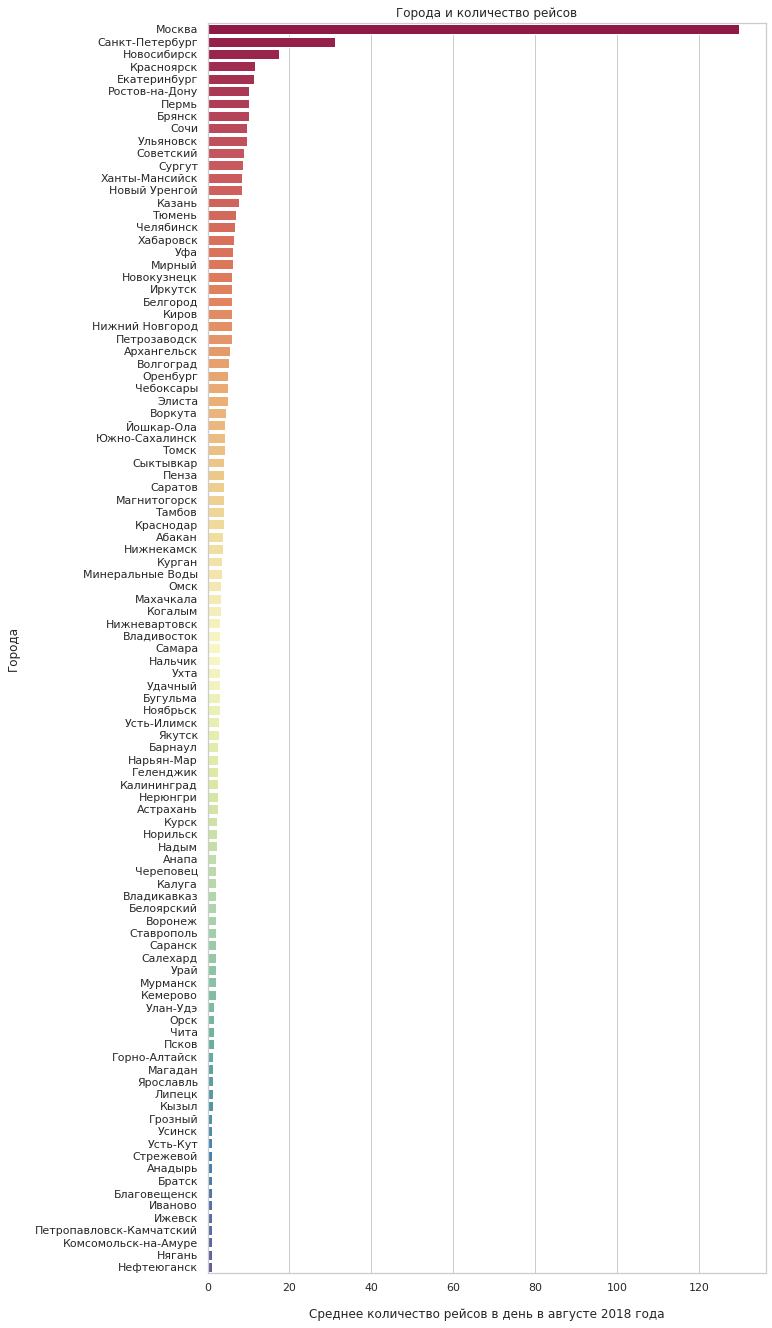

In [10]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 23))

ax = sns.barplot(y="city", 
                 x='average_flights', 
                 data=city.sort_values('average_flights', ascending = False), 
                 palette = 'Spectral')
plt.title('Города и количество рейсов')
plt.xlabel('Среднее количество рейсов в день в августе 2018 года', labelpad = 15)
plt.ylabel('Города', labelpad = 15)
plt.show();

***Вывод***

Здесь всё логично: чем крупнее и населённее город, тем больше рейсов в него прилетает.

**Топ-10 городов и количество рейсов**

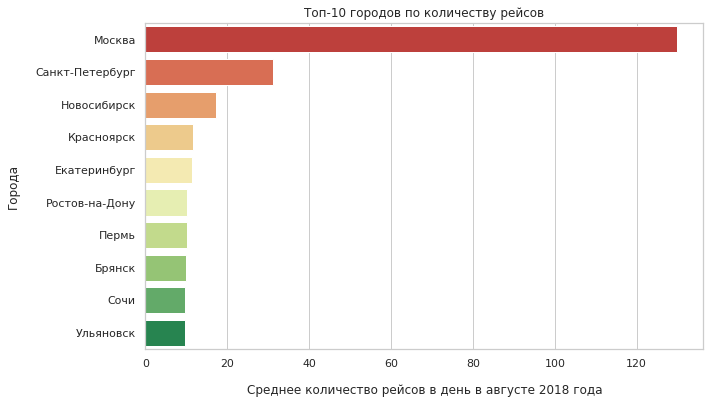

In [11]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 6))

ax = sns.barplot(y="city", 
                 x='average_flights', 
                 data=top_10_city, 
                 palette = 'RdYlGn')
plt.title('Топ-10 городов по количеству рейсов')
plt.xlabel('Среднее количество рейсов в день в августе 2018 года', labelpad = 15)
plt.ylabel('Города', labelpad = 15)
plt.show();

***Вывод***

В августе фестивали проходили в Москве (один), Нижнем Новгороде, Иркутске и Твери.

Можно сделать вывод, что количество рейсов не коррелирует с фестивалями в городах. В топ-10 городов по количеству рейсов вошла только Москва, но совсем по иным причинам: 5 пассажирских аэропортов, 3 из которых - крупнейшие в России.

## Шаг 3. Общий вывод

### Частота рейсов разных моделей самолётов.

В тройку лидеров по числу полётов в сентябре 2018 года вошли модели с достаточно малой вместимостью, которые обычно летают на короткие расстояния (для региональных и местных авиалиний): 
    - Cessna 208 Caravan (вместимость - 9 пассажиров), 
    - Bombardier CRJ-200 (50 мест), 
    - Sukhoi SuperJet-100 (98 пассажиров).

За ними следуют с большим отрывом по количеству полётов разные модели Boeing и Airbus. Их вместимость гораздо выше - в среднем от 150 до 500 в зависимости от модели. Они обычно используются для дальних полётов.

Можно сделать вывод, что по России в основном летают модели малой вместимости.


### Распределение городов по количеству рейсов.

Здесь всё логично: чем крупнее и населённее город, тем больше рейсов в него прилетает. 

Также есть зависимость от количества аэропортов и их загруженности: 
    - в Москве находится 3 крупнейших аэропорта России, поэтому по количеству рейсов в день она с огромным отрывом лидирует от остальных городов,
    - питерский Пулково также входит в 5-ку самых загруженных аэропортов нашей страны, он на втором месте по количеству рейсов в день.

### Спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

В августе 2018 года фестивали проходили в Москве (один), Нижнем Новгороде, Иркутске и Твери.

По полученным данным можно сделать вывод, что количество рейсов не коррелирует с фестивалями в городах. В топ-10 городов по количеству рейсов вошла только Москва, но совсем по иным причинам, которые мы определили выше.